In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv("Crime Economics - data.csv")
df

,Country,Crime Rate,Unemployment (%),HDI,Population Density (per sq. km),Weapons per 100 persons,Per Capita Income,Gini Coefficient,Literacy Rate,Happiness Index
0,Afghanistan,76.31,11.2,0.51,57.00,12.5,508.00,27.8,0.38,2.52
1,Albania,42.53,11.3,0.80,100.00,12.0,"5,181.00",33.2,0.98,5.12
2,Algeria,52.03,11.5,0.75,18.00,2.1,"3,368.00",27.6,0.80,4.89
3,Argentina,63.82,7.0,0.85,16.00,7.4,"8,476.00",41.4,0.98,5.93
4,Armenia,22.79,7.7,0.78,99.00,6.1,"4,266.00",34.4,1.00,5.28
...,...,...,...,...,...,...,...,...,...,...
109,Uzbekistan,33.42,8.9,0.72,73.00,0.4,"1,724.00",39.7,1.00,6.18
110,Venezuela,83.76,9.4,0.71,32.00,18.5,"3,740.00",46.9,0.95,4.89
111,Vietnam,46.19,8.8,0.70,289.00,1.6,"2,786.00",35.7,0.95,5.41
112,Zambia,43.62,11.4,0.58,23.00,0.9,985.00,57.1,0.63,4.07


In [3]:
df.head()

,Country,Crime Rate,Unemployment (%),HDI,Population Density (per sq. km),Weapons per 100 persons,Per Capita Income,Gini Coefficient,Literacy Rate,Happiness Index
0,Afghanistan,76.31,11.2,0.51,57.00,12.5,508.00,27.8,0.38,2.52
1,Albania,42.53,11.3,0.80,100.00,12.0,"5,181.00",33.2,0.98,5.12
2,Algeria,52.03,11.5,0.75,18.00,2.1,"3,368.00",27.6,0.80,4.89
3,Argentina,63.82,7.0,0.85,16.00,7.4,"8,476.00",41.4,0.98,5.93
4,Armenia,22.79,7.7,0.78,99.00,6.1,"4,266.00",34.4,1.00,5.28


In [4]:
df.tail()

,Country,Crime Rate,Unemployment (%),HDI,Population Density (per sq. km),Weapons per 100 persons,Per Capita Income,Gini Coefficient,Literacy Rate,Happiness Index
109,Uzbekistan,33.42,8.9,0.72,73.00,0.4,"1,724.00",39.7,1.00,6.18
110,Venezuela,83.76,9.4,0.71,32.00,18.5,"3,740.00",46.9,0.95,4.89
111,Vietnam,46.19,8.8,0.70,289.00,1.6,"2,786.00",35.7,0.95,5.41
112,Zambia,43.62,11.4,0.58,23.00,0.9,985.00,57.1,0.63,4.07
113,Zimbabwe,59.30,5.0,0.57,37.00,2.8,"1,466.00",44.3,0.87,3.15


In [5]:
df.describe()

,Crime Rate,Unemployment (%),HDI,Weapons per 100 persons,Gini Coefficient,Literacy Rate,Happiness Index
count,114.000000,114.000000,114.000000,114.00000,114.000000,114.000000,114.000000
mean,44.498421,7.743860,0.782456,12.35000,37.091754,0.899912,5.748333
std,14.220020,5.642052,0.122609,14.30866,9.578128,0.138765,1.025004
min,15.230000,0.700000,0.490000,0.00000,0.360000,0.380000,2.520000
25%,33.420000,4.200000,0.712500,2.85000,31.425000,0.837500,5.045000
50%,44.715000,6.400000,0.780000,9.25000,35.050000,0.960000,5.845000
75%,54.212500,9.825000,0.890000,16.65000,42.125000,0.990000,6.367500
max,83.760000,35.300000,0.960000,120.50000,69.300000,1.000000,7.840000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          114 non-null    object 
 1   Crime Rate                       114 non-null    float64
 2   Unemployment (%)                 114 non-null    float64
 3   HDI                              114 non-null    float64
 4   Population Density (per sq. km)  114 non-null    object 
 5   Weapons per 100 persons          114 non-null    float64
 6   Per Capita Income                114 non-null    object 
 7   Gini Coefficient                 114 non-null    float64
 8   Literacy Rate                    114 non-null    float64
 9   Happiness Index                  114 non-null    float64
dtypes: float64(7), object(3)
memory usage: 9.0+ KB


In [7]:
df.dtypes

Country                             object
Crime Rate                         float64
Unemployment (%)                   float64
HDI                                float64
Population Density (per sq. km)     object
Weapons per 100 persons            float64
Per Capita Income                   object
Gini Coefficient                   float64
Literacy Rate                      float64
Happiness Index                    float64
dtype: object

In [8]:
df['Population Density (per sq. km)'] = df['Population Density (per sq. km)'].str.replace(',', '').astype(float)


In [9]:
df['Per Capita Income'] = df['Per Capita Income'].str.replace(',', '').astype(float)

In [10]:
df

,Country,Crime Rate,Unemployment (%),HDI,Population Density (per sq. km),Weapons per 100 persons,Per Capita Income,Gini Coefficient,Literacy Rate,Happiness Index
0,Afghanistan,76.31,11.2,0.51,57.0,12.5,508.0,27.8,0.38,2.52
1,Albania,42.53,11.3,0.80,100.0,12.0,5181.0,33.2,0.98,5.12
2,Algeria,52.03,11.5,0.75,18.0,2.1,3368.0,27.6,0.80,4.89
3,Argentina,63.82,7.0,0.85,16.0,7.4,8476.0,41.4,0.98,5.93
4,Armenia,22.79,7.7,0.78,99.0,6.1,4266.0,34.4,1.00,5.28
...,...,...,...,...,...,...,...,...,...,...
109,Uzbekistan,33.42,8.9,0.72,73.0,0.4,1724.0,39.7,1.00,6.18
110,Venezuela,83.76,9.4,0.71,32.0,18.5,3740.0,46.9,0.95,4.89
111,Vietnam,46.19,8.8,0.70,289.0,1.6,2786.0,35.7,0.95,5.41
112,Zambia,43.62,11.4,0.58,23.0,0.9,985.0,57.1,0.63,4.07


In [11]:
df.dtypes

Country                             object
Crime Rate                         float64
Unemployment (%)                   float64
HDI                                float64
Population Density (per sq. km)    float64
Weapons per 100 persons            float64
Per Capita Income                  float64
Gini Coefficient                   float64
Literacy Rate                      float64
Happiness Index                    float64
dtype: object

In [12]:
df.index

RangeIndex(start=0, stop=114, step=1)

In [13]:
corr = df.corr()

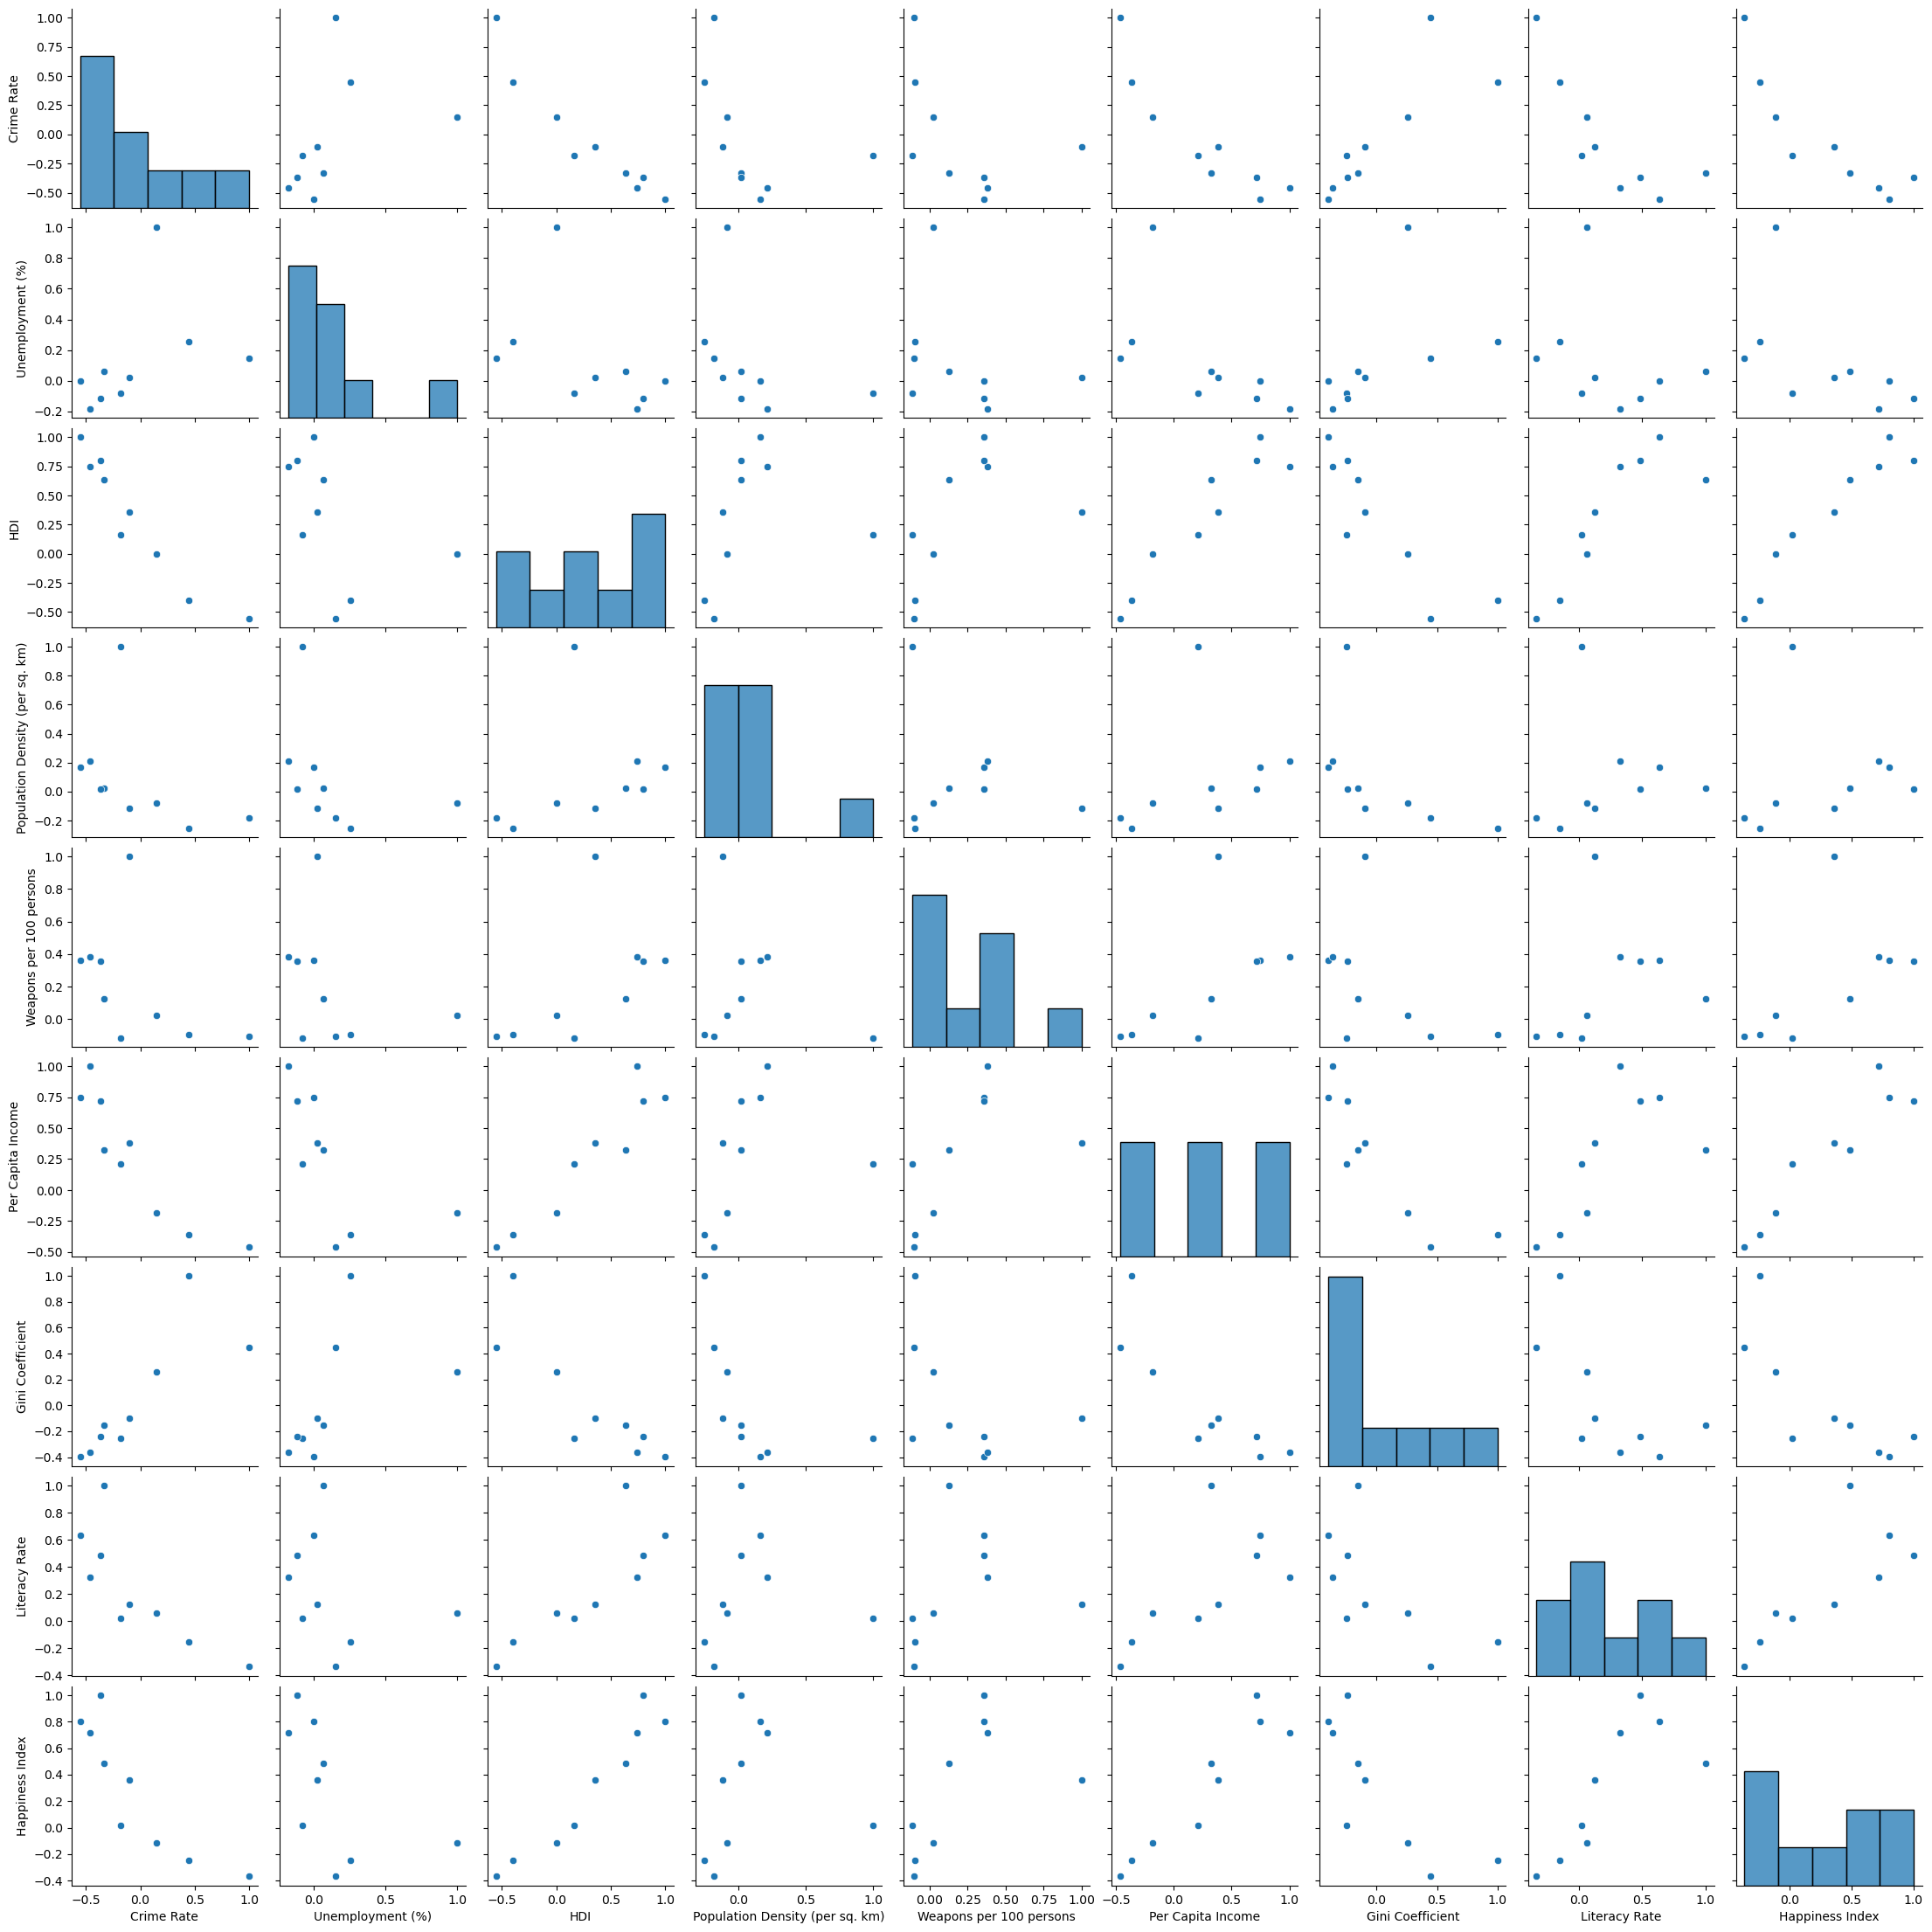

In [14]:
sns.pairplot(corr)

<AxesSubplot:>

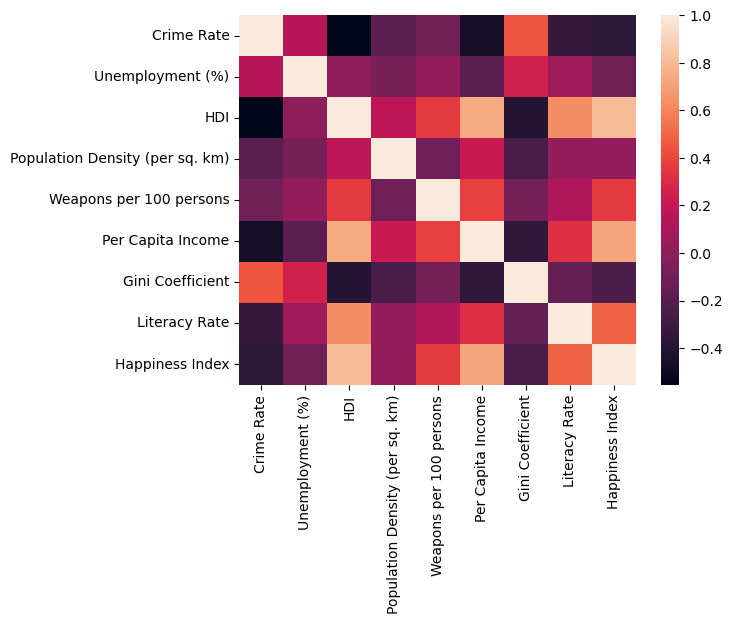

In [15]:
sns.heatmap(corr)

In [16]:
df.columns

Index(['Country', 'Crime Rate', 'Unemployment (%)', 'HDI',
       'Population Density (per sq. km)', 'Weapons per 100 persons',
       'Per Capita Income', 'Gini Coefficient', 'Literacy Rate',
       'Happiness Index'],
      dtype='object')

In [17]:
for column in df.columns:
    unique = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique)

Unique values in Country:
['Afghanistan' 'Albania' 'Algeria' 'Argentina' 'Armenia' 'Australia'
 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cambodia' 'Cameroon'
 'Canada' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Estonia' 'Ethiopia' 'Finland' 'France' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Honduras' 'Hong Kong' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kyrgyzstan' 'Latvia' 'Lebanon'
 'Libya' 'Lithuania' 'Luxembourg' 'Malaysia' 'Maldives' 'Malta'
 'Mauritius' 'Mexico' 'Moldova' 'Mongolia' 'Montenegro' 'Morocco'
 'Myanmar' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Nigeria' 'North Macedonia' 'Norway' 'Pakistan' 'Panama' 'Paraguay'
 'Peru' 'Philippines' 'Poland' 'Portugal' 'Romania' 'Russia' 'Rwanda'
 'Sau

In [18]:
df.isnull()

,Country,Crime Rate,Unemployment (%),HDI,Population Density (per sq. km),Weapons per 100 persons,Per Capita Income,Gini Coefficient,Literacy Rate,Happiness Index
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
109,False,False,False,False,False,False,False,False,False,False
110,False,False,False,False,False,False,False,False,False,False
111,False,False,False,False,False,False,False,False,False,False
112,False,False,False,False,False,False,False,False,False,False


In [19]:
df.isnull().sum()

Country                            0
Crime Rate                         0
Unemployment (%)                   0
HDI                                0
Population Density (per sq. km)    0
Weapons per 100 persons            0
Per Capita Income                  0
Gini Coefficient                   0
Literacy Rate                      0
Happiness Index                    0
dtype: int64

In [20]:
df.isna()

,Country,Crime Rate,Unemployment (%),HDI,Population Density (per sq. km),Weapons per 100 persons,Per Capita Income,Gini Coefficient,Literacy Rate,Happiness Index
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
109,False,False,False,False,False,False,False,False,False,False
110,False,False,False,False,False,False,False,False,False,False
111,False,False,False,False,False,False,False,False,False,False
112,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isna().sum()

Country                            0
Crime Rate                         0
Unemployment (%)                   0
HDI                                0
Population Density (per sq. km)    0
Weapons per 100 persons            0
Per Capita Income                  0
Gini Coefficient                   0
Literacy Rate                      0
Happiness Index                    0
dtype: int64

<AxesSubplot:xlabel='Crime Rate', ylabel='Count'>

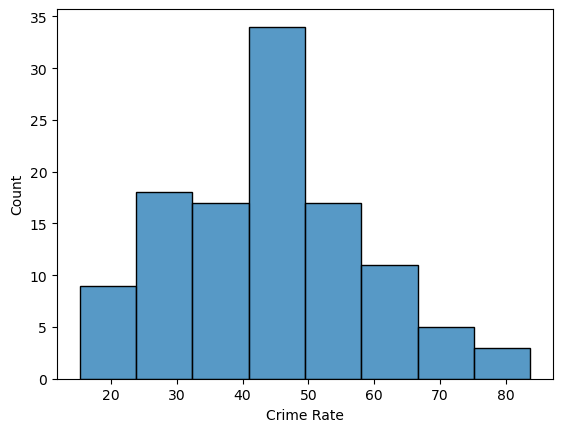

In [22]:
sns.histplot(x = df['Crime Rate'], data=df)

<AxesSubplot:xlabel='Unemployment (%)', ylabel='Count'>

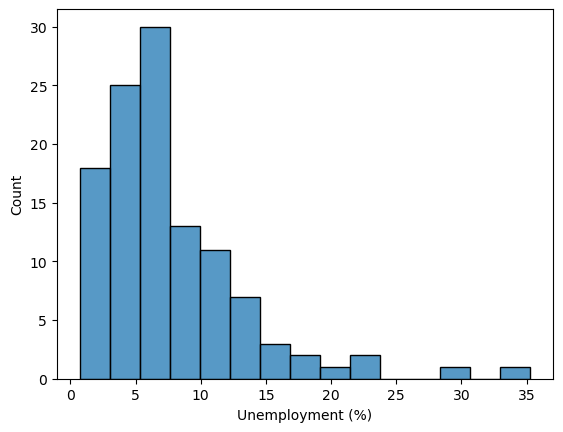

In [23]:
sns.histplot(x = df['Unemployment (%)'], data=df)

<AxesSubplot:xlabel='HDI', ylabel='Count'>

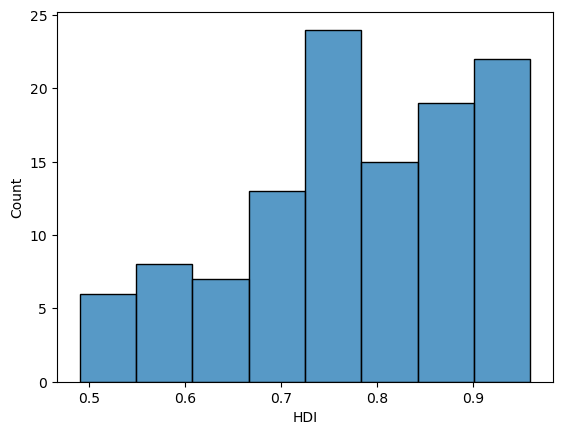

In [24]:
sns.histplot(x = df['HDI'], data=df)

<AxesSubplot:xlabel='Weapons per 100 persons', ylabel='Count'>

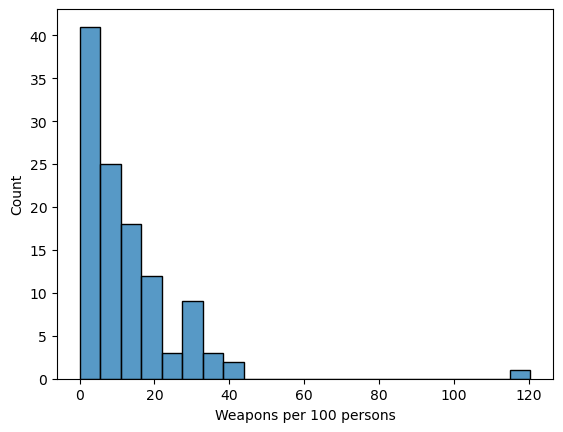

In [25]:
sns.histplot(x = df['Weapons per 100 persons'], data=df)

<AxesSubplot:xlabel='Gini Coefficient', ylabel='Count'>

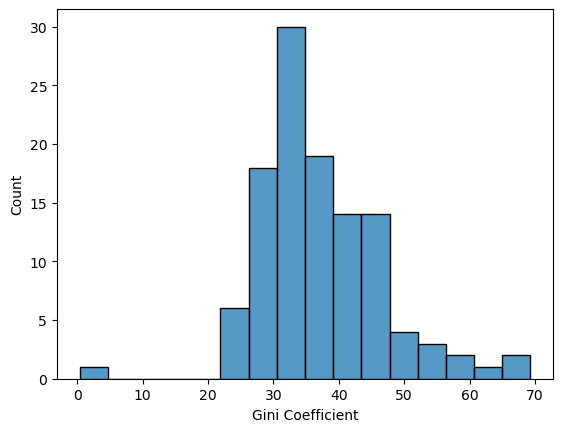

In [26]:
sns.histplot(x = df['Gini Coefficient'], data=df)

<AxesSubplot:xlabel='Literacy Rate', ylabel='Count'>

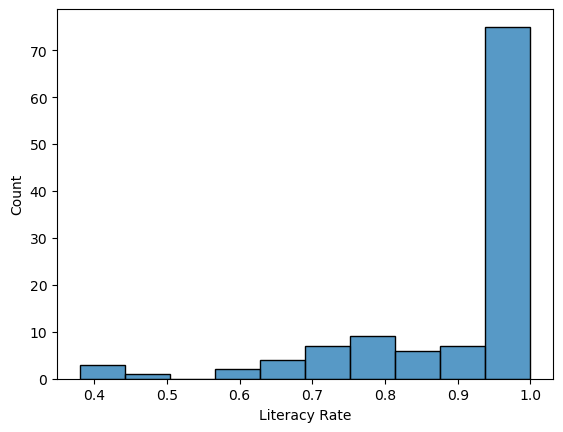

In [27]:
sns.histplot(x = df['Literacy Rate'], data=df)

<AxesSubplot:xlabel='Happiness Index', ylabel='Count'>

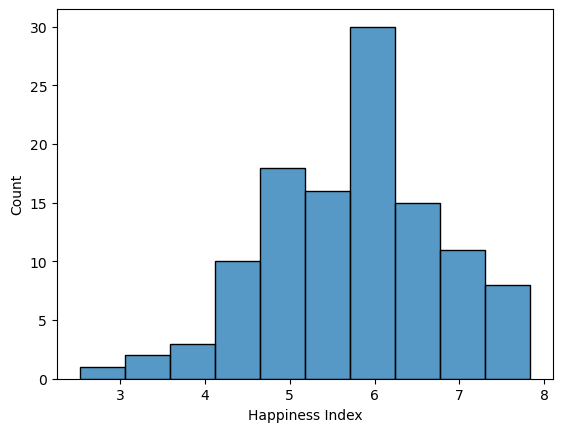

In [28]:
sns.histplot(x = df['Happiness Index'], data=df)

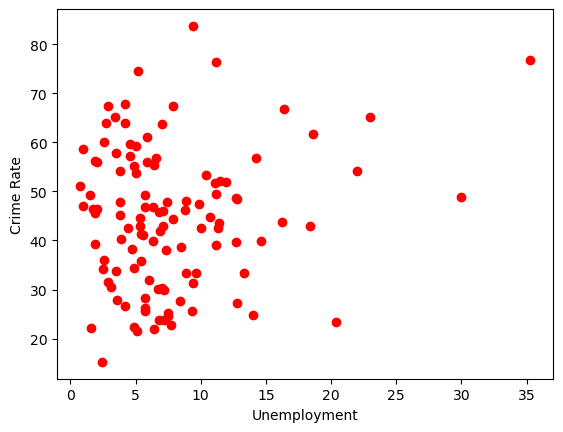

In [29]:
plt.scatter(x = df['Unemployment (%)'], y = df['Crime Rate'], c='r')
plt.xlabel("Unemployment")
plt.ylabel("Crime Rate")
plt.show()

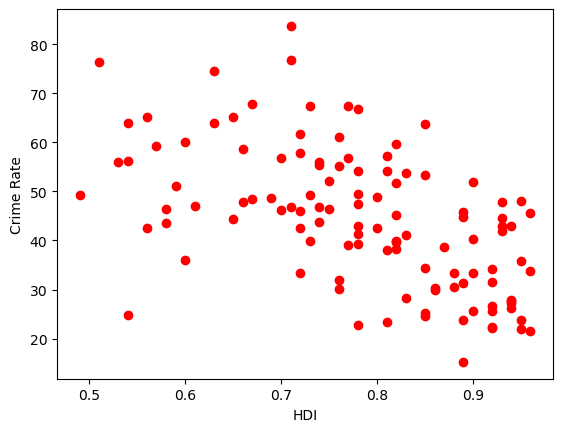

In [30]:
plt.scatter(x = df['HDI'], y = df['Crime Rate'], c='r')
plt.xlabel("HDI")
plt.ylabel("Crime Rate")
plt.show()

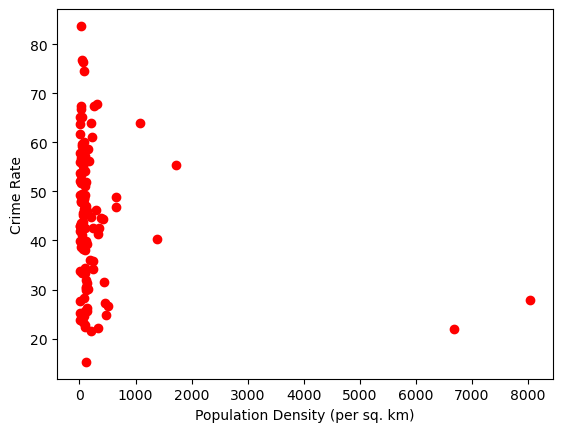

In [31]:
plt.scatter(x = df['Population Density (per sq. km)'], y = df['Crime Rate'], c='r')
plt.xlabel("Population Density (per sq. km)")
plt.ylabel("Crime Rate")
plt.show()

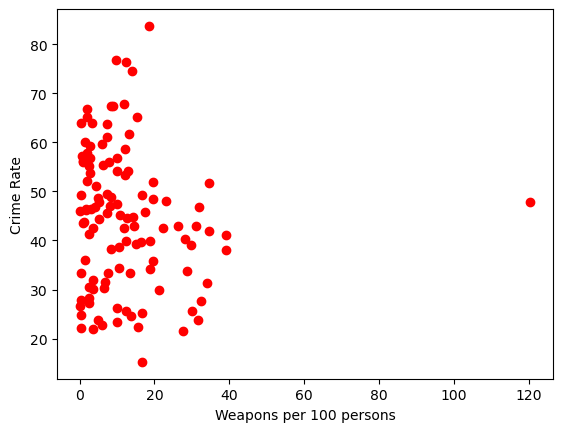

In [32]:
plt.scatter(x = df['Weapons per 100 persons'], y = df['Crime Rate'], c='r')
plt.xlabel("Weapons per 100 persons")
plt.ylabel("Crime Rate")
plt.show()

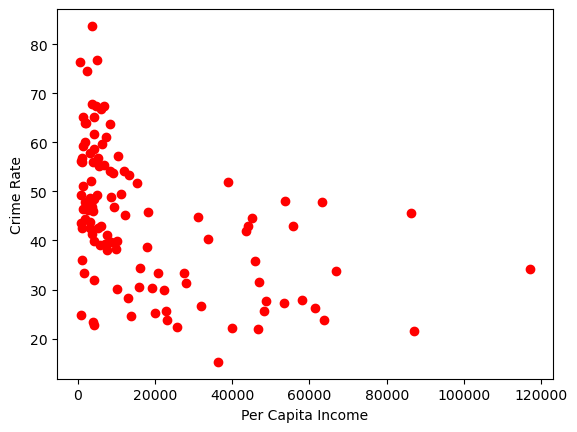

In [33]:
plt.scatter(x = df['Per Capita Income'], y = df['Crime Rate'], c='r')
plt.xlabel("Per Capita Income")
plt.ylabel("Crime Rate")
plt.show()

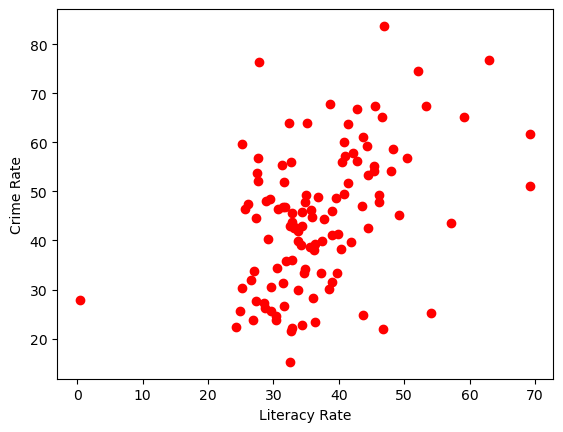

In [34]:
plt.scatter(x = df['Gini Coefficient'], y = df['Crime Rate'], c='r')
plt.xlabel("Literacy Rate")
plt.ylabel("Crime Rate")
plt.show()

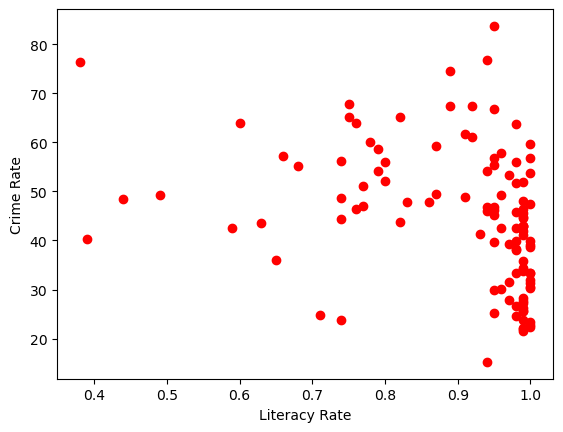

In [35]:
plt.scatter(x = df['Literacy Rate'], y = df['Crime Rate'], c='r')
plt.xlabel("Literacy Rate")
plt.ylabel("Crime Rate")
plt.show()

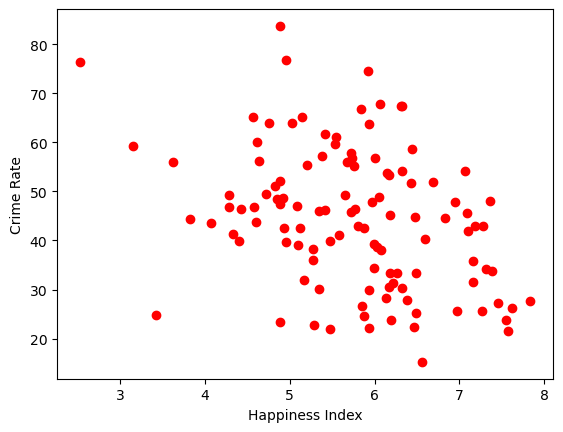

In [36]:
plt.scatter(x = df['Happiness Index'], y = df['Crime Rate'], c='r')
plt.xlabel("Happiness Index")
plt.ylabel("Crime Rate")
plt.show()

In [37]:
print(f"The data has dimensions {df.shape[0]} by {df.shape[1]}")

The data has dimensions 114 by 10


Models

Linear Regression

In [38]:
x = df['Unemployment (%)']
y = df['Crime Rate']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(91,)
(23,)
(91,)
(23,)


In [41]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

In [42]:
model = LinearRegression()

In [43]:
model.fit(x_train,y_train)

LinearRegression()

In [44]:
model.score(x_test,y_test)

-0.007634769384835982

In [45]:
model.coef_

array([0.02319364])

In [46]:
model.intercept_

43.92981780961712

In [47]:
model.predict(x_test)

array([44.04346663, 44.09449263, 44.12696373, 44.31019346, 44.224377  ,
       44.15943482, 43.97388572, 44.36121946, 44.05506345, 43.95301145,
       44.01795363, 44.7485532 , 44.19654464, 44.30555473, 44.19422527,
       44.045786  , 43.97620508, 44.05506345, 44.09217327, 44.096812  ,
       44.05274409, 44.08985391, 44.01099554])

SVR

In [48]:
svr_reg = SVR(kernel='rbf')

In [49]:
svr_reg.fit(x_train, y_train)

SVR()

In [50]:
svr_reg.score(x_test, y_test)

-0.0130052739576616

In [51]:
svr_reg.predict(x_test)

array([44.46390688, 43.1346723 , 42.74214205, 42.46102554, 42.57927347,
       42.65155736, 46.33796802, 43.18547422, 44.10723728, 46.58850538,
       45.2636075 , 45.04111084, 42.64761599, 42.43307761, 42.6498702 ,
       44.39131868, 46.29854224, 44.10723728, 43.17759932, 43.09377038,
       44.17709812, 43.22253485, 45.47010505])

Random Forest

In [52]:
forest_reg = RandomForestRegressor(n_estimators=100)

In [53]:
forest_reg.fit(x_train, y_train)

RandomForestRegressor()

In [54]:
forest_reg.score(x_test, y_test)

-0.18084155194459428

In [55]:
forest_reg.predict(x_test)

array([44.38873056, 47.9662    , 34.19316   , 42.05879333, 39.19645   ,
       41.00206667, 50.13535024, 38.1855    , 45.63565   , 47.3021    ,
       46.21371667, 50.3416    , 47.08810333, 44.00199333, 47.08810333,
       53.02751889, 47.39150857, 45.63565   , 56.49124   , 34.3573    ,
       48.90143333, 37.78749   , 57.45489333])

1

Linear Regression

In [56]:
x1 = df['HDI']
y1 = df['Crime Rate']

In [57]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.2,random_state=1)

In [58]:
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(91,)
(23,)
(91,)
(23,)


In [59]:
x1_train = x1_train.values.reshape(-1,1)
x1_test = x1_test.values.reshape(-1,1)

In [60]:
model1 = LinearRegression()

In [61]:
model1.fit(x1_train,y1_train)

LinearRegression()

In [62]:
model1.score(x1_test,y1_test)

0.32143810677152107

In [63]:
model1.coef_

array([-63.99590998])

In [64]:
model1.intercept_

94.03296273541734

In [65]:
model1.predict(x1_test)

array([35.15672555, 47.95590755, 38.35652105, 44.11615295, 49.87578485,
       44.11615295, 44.11615295, 47.95590755, 33.23684825, 51.79566215,
       44.11615295, 48.59586665, 46.03603025, 46.67598935, 56.91533494,
       40.91635745, 60.11513044, 44.11615295, 38.99648015, 33.23684825,
       34.51676645, 34.51676645, 32.59688915])

SVR

In [66]:
svr_reg1 = SVR(kernel='rbf')

In [67]:
svr_reg1.fit(x1_train, y1_train)

SVR()

In [68]:
svr_reg1.score(x1_test, y1_test)

0.3127046067027307

In [69]:
svr_reg1.predict(x1_test)

array([34.23008381, 47.57808431, 35.98305197, 44.11910437, 48.1916991 ,
       44.11910437, 44.11910437, 47.57808431, 34.79484483, 48.32911347,
       44.11910437, 47.85188657, 46.25008374, 46.78225915, 47.93194721,
       39.40017803, 47.4137718 , 44.11910437, 36.71618651, 34.79484483,
       34.29533805, 34.29533805, 35.19957637])

Random Forest

In [70]:
forest_reg1 = RandomForestRegressor(n_estimators=100)

In [71]:
forest_reg1.fit(x1_train, y1_train)

RandomForestRegressor()

In [72]:
forest_reg1.score(x1_test, y1_test)

0.3452532418140508

In [73]:
forest_reg1.predict(x1_test)

array([28.19300896, 44.7477156 , 31.25552738, 38.50618694, 52.970615  ,
       38.50618694, 38.50618694, 44.7477156 , 35.2240506 , 51.84502833,
       38.50618694, 62.00152583, 48.25800643, 52.15575714, 49.664675  ,
       35.29104758, 48.72078389, 38.50618694, 34.59829381, 35.2240506 ,
       43.46410524, 43.46410524, 35.63863119])

2

Linear Regression

In [74]:
x2 = df['Population Density (per sq. km)']
y2 = df['Crime Rate']

In [75]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.2,random_state=1)

In [76]:
print(x2_train.shape)
print(x2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(91,)
(23,)
(91,)
(23,)


In [77]:
x2_train = x2_train.values.reshape(-1,1)
x2_test = x2_test.values.reshape(-1,1)

In [78]:
model2 = LinearRegression()

In [79]:
model2.fit(x2_train,y2_train)

LinearRegression()

In [80]:
model2.score(x2_test,y2_test)

-0.005095386322439888

In [81]:
model2.coef_

array([-0.00251465])

In [82]:
model2.intercept_

44.94808952748543

In [83]:
model2.predict(x2_test)

array([44.69159477, 44.5960379 , 44.87264989, 44.88522317, 44.74440251,
       44.76451975, 44.60861117, 44.93803091, 44.36217503, 44.55077412,
       44.78715164, 44.82990077, 44.90282575, 44.76954906, 44.89025247,
       44.93048695, 44.79972491, 44.13334147, 44.66896288, 44.94054556,
       44.90282575, 44.93803091, 44.90785506])

SVR

In [84]:
svr_reg2 = SVR(kernel='rbf')

In [85]:
svr_reg2.fit(x2_train, y2_train)

SVR()

In [86]:
svr_reg2.score(x2_test, y2_test)

-0.00013250373905360213

In [87]:
svr_reg2.predict(x2_test)

array([45.15593899, 45.07773789, 45.29843327, 45.307964  , 45.19839552,
       45.21439539, 45.08811036, 45.34737195, 44.88271286, 45.04023721,
       45.23226875, 45.26563408, 45.3212137 , 45.21837911, 45.31176087,
       45.34180602, 45.24213743, 44.6945231 , 45.13756166, 45.34922237,
       45.3212137 , 45.34737195, 45.32497884])

Random Forest

In [88]:
forest_reg2 = RandomForestRegressor(n_estimators=100)

In [89]:
forest_reg2.fit(x2_train, y2_train)

RandomForestRegressor()

In [90]:
forest_reg2.score(x2_test, y2_test)

-0.01640067852072602

In [91]:
forest_reg2.predict(x2_test)

array([39.52772738, 26.3438    , 40.49636083, 58.15442   , 40.2067    ,
       30.68758833, 26.9288    , 53.04505333, 39.3867    , 35.9838    ,
       41.70095   , 53.82524167, 45.57842   , 39.19027167, 52.08337   ,
       46.55233   , 50.32431   , 33.4489    , 32.03393333, 53.04505333,
       45.57842   , 53.04505333, 37.05922833])

3

Linear Regression

In [92]:
x3 = df['Weapons per 100 persons']
y3 = df['Crime Rate']

In [93]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.2,random_state=1)

In [94]:
print(x3_train.shape)
print(x3_test.shape)
print(y3_train.shape)
print(y3_test.shape)

(91,)
(23,)
(91,)
(23,)


In [95]:
x3_train = x3_train.values.reshape(-1,1)
x3_test = x3_test.values.reshape(-1,1)

In [96]:
model3 = LinearRegression()

In [97]:
model3.fit(x3_train,y3_train)

LinearRegression()

In [98]:
model3.score(x3_test,y3_test)

0.011175677484889457

In [99]:
model3.coef_

array([-0.0514453])

In [100]:
model3.intercept_

44.74899843687709

In [101]:
model3.predict(x3_test)

array([43.94645174, 44.74899844, 44.20882278, 44.64610784, 44.50206099,
       44.23968996, 43.97217439, 44.06477594, 43.74067054, 44.1265103 ,
       44.08535406, 44.24997902, 44.64096331, 44.69240861, 44.70269767,
       44.60495159, 44.7078422 , 44.62552971, 44.41460398, 43.1181824 ,
       43.39598702, 42.9638465 , 43.26737377])

SVR

In [102]:
svr_reg3 = SVR(kernel='rbf')

In [103]:
svr_reg3.fit(x3_train, y3_train)

SVR()

In [104]:
svr_reg3.score(x3_test, y3_test)

0.10048243215727704

In [105]:
svr_reg3.predict(x3_test)

array([44.14316076, 46.15945938, 45.3836997 , 46.24589361, 46.18384984,
       45.50493833, 44.27533258, 44.73799666, 43.08044816, 45.02870683,
       44.83683512, 45.54372369, 46.2475019 , 46.2194387 , 46.21071938,
       46.25103422, 46.20598554, 46.2506833 , 46.03520341, 40.98775912,
       41.58914448, 40.95896123, 41.22694699])

Random Forest

In [106]:
forest_reg3 = RandomForestRegressor(n_estimators=100)

In [107]:
forest_reg3.fit(x3_train, y3_train)

RandomForestRegressor()

In [108]:
forest_reg3.score(x3_test, y3_test)

-0.6611520413716885

In [109]:
forest_reg3.predict(x3_test)

array([58.7413    , 28.089425  , 37.824025  , 58.15426667, 34.382     ,
       35.32251667, 60.6626    , 32.2933    , 48.64389   , 53.79801   ,
       48.35365   , 35.54521667, 60.97126667, 53.48525833, 53.29064   ,
       52.46877   , 53.29064   , 45.59397571, 38.6878    , 42.5926    ,
       28.5001    , 43.9949    , 37.6976    ])

4

Linear Regression

In [110]:
x4 = df['Per Capita Income']
y4 = df['Crime Rate']

In [111]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.2,random_state=1)

In [112]:
print(x4_train.shape)
print(x4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(91,)
(23,)
(91,)
(23,)


In [113]:
x4_train = x4_train.values.reshape(-1,1)
x4_test = x4_test.values.reshape(-1,1)

In [114]:
model4 = LinearRegression()

In [115]:
model4.fit(x4_train,y4_train)

LinearRegression()

In [116]:
model4.score(x4_test,y4_test)

0.3153957542949096

In [117]:
model4.coef_

array([-0.00027998])

In [118]:
model4.intercept_

49.1055243486027

In [119]:
model4.predict(x4_test)

array([41.88857751, 48.02201641, 44.10206945, 47.38003095, 48.23535828,
       48.10964896, 47.09277536, 47.91758528, 36.2520964 , 47.8926674 ,
       46.7744424 , 47.67932552, 48.16256446, 48.17656327, 48.82974778,
       46.55466108, 48.79335087, 48.05057398, 43.71206259, 31.28671827,
       36.79441033, 36.90976053, 30.38323503])

SVR

In [120]:
svr_reg4 = SVR(kernel='rbf')

In [121]:
svr_reg4.fit(x4_train, y4_train)

SVR()

In [122]:
svr_reg4.score(x4_test, y4_test)

0.28090009868366994

In [123]:
svr_reg4.predict(x4_test)

array([35.85091264, 46.61052663, 39.89481009, 45.94106534, 46.77775343,
       46.68263052, 45.56495234, 46.51843352, 33.8265832 , 46.49547476,
       45.09759201, 46.28356272, 46.72386823, 46.73448688, 47.09362575,
       44.74634918, 47.08064274, 46.63454435, 39.09175899, 36.81532655,
       33.61639667, 33.57837264, 37.32828955])

Random Forest

In [124]:
forest_reg4 = RandomForestRegressor(n_estimators=100)

In [125]:
forest_reg4.fit(x4_train, y4_train)

RandomForestRegressor()

In [126]:
forest_reg4.score(x4_test, y4_test)

-0.3994050497065751

In [127]:
forest_reg4.predict(x4_test)

array([31.5444, 59.3112, 41.0899, 46.6959, 53.3791, 59.8615, 59.595 ,
       36.7283, 28.1862, 39.9704, 55.2157, 45.9484, 47.9635, 47.5894,
       52.4315, 46.8404, 39.9893, 76.5287, 31.6221, 40.4215, 36.8379,
       36.8379, 40.4215])

5

Linear Regression

In [128]:
x5 = df['Gini Coefficient']
y5 = df['Crime Rate']

In [129]:
x5_train, x5_test, y5_train, y5_test = train_test_split(x5,y5,test_size=0.2,random_state=1)

In [130]:
print(x5_train.shape)
print(x5_test.shape)
print(y5_train.shape)
print(y5_test.shape)

(91,)
(23,)
(91,)
(23,)


In [131]:
x5_train = x5_train.values.reshape(-1,1)
x5_test = x5_test.values.reshape(-1,1)

In [132]:
model5 = LinearRegression()

In [133]:
model5.fit(x5_train,y5_train)

LinearRegression()

In [134]:
model5.score(x5_test,y5_test)

0.4530645360329869

In [135]:
model5.coef_

array([0.62063201])

In [136]:
model5.intercept_

21.211269769609814

In [137]:
model5.predict(x5_test)

array([36.2305644 , 45.41591813, 43.3057693 , 47.77431977, 45.72623414,
       37.40976521, 43.80227491, 64.22106802, 41.00943087, 51.18779582,
       49.38796299, 60.31108636, 38.34071323, 41.56799968, 56.6493575 ,
       38.27865003, 46.34686615, 45.91242374, 36.85119641, 37.84420762,
       41.38181007, 42.18863169, 37.96833402])

SVR

In [138]:
svr_reg5 = SVR(kernel='rbf')

In [139]:
svr_reg5.fit(x5_train, y5_train)

SVR()

In [140]:
svr_reg5.score(x5_test, y5_test)

0.2008518024611211

In [141]:
svr_reg5.predict(x5_test)

array([45.89564691, 45.77020051, 43.28107089, 49.2475491 , 46.23177636,
       44.99652934, 43.72687361, 48.9795316 , 42.65225759, 51.76912538,
       50.96163082, 49.42310439, 44.23403081, 42.5907365 , 50.29389484,
       44.28452963, 47.17708882, 46.51355887, 45.43895478, 44.64108119,
       42.59703536, 42.67910806, 44.5389364 ])

Random Forest

In [142]:
forest_reg5 = RandomForestRegressor(n_estimators=100)

In [143]:
forest_reg5.fit(x5_train, y5_train)

RandomForestRegressor()

In [144]:
forest_reg5.score(x5_test, y5_test)

0.3588368129241213

In [145]:
forest_reg5.predict(x5_test)

array([35.05723333, 39.89549   , 44.7086    , 55.9291    , 35.854275  ,
       43.49393333, 30.2801    , 53.5648    , 44.79775   , 54.1714    ,
       57.50536   , 59.4784    , 59.14012667, 40.67691667, 54.8984    ,
       39.92108833, 43.38316667, 35.50665667, 48.34063333, 34.37767   ,
       26.95124167, 33.8825    , 34.05347   ])

6

Linear Regression

In [146]:
x6 = df['Literacy Rate']
y6 = df['Crime Rate']

In [147]:
x6_train, x6_test, y6_train, y6_test = train_test_split(x6,y6,test_size=0.2,random_state=1)

In [148]:
print(x6_train.shape)
print(x6_test.shape)
print(y6_train.shape)
print(y6_test.shape)

(91,)
(23,)
(91,)
(23,)


In [149]:
x6_train = x6_train.values.reshape(-1,1)
x6_test = x6_test.values.reshape(-1,1)

In [150]:
model6 = LinearRegression()

In [151]:
model6.fit(x6_train,y6_train)

LinearRegression()

In [152]:
model6.score(x6_test,y6_test)

0.04319159714172249

In [153]:
model6.coef_

array([-34.45618803])

In [154]:
model6.intercept_

74.95362857734011

In [155]:
model6.predict(x6_test)

array([40.49744055, 42.56481183, 40.49744055, 42.22024995, 49.45604944,
       40.49744055, 41.53112619, 43.59849747, 40.84200243, 47.73324004,
       42.56481183, 42.56481183, 47.38867815, 46.69955439, 53.24623012,
       40.49744055, 47.38867815, 42.90937371, 40.49744055, 40.84200243,
       40.84200243, 40.84200243, 40.84200243])

SVR

In [156]:
svr_reg6 = SVR(kernel='rbf')

In [157]:
svr_reg6.fit(x6_train, y6_train)

SVR()

In [158]:
svr_reg6.score(x6_test, y6_test)

0.167615464513455

In [159]:
svr_reg6.predict(x6_test)

array([40.84631457, 44.53683658, 40.84631457, 43.78676105, 50.5587106 ,
       40.84631457, 42.40412438, 46.81952691, 41.2802156 , 51.18262257,
       44.53683658, 44.53683658, 51.18904877, 51.0267064 , 48.64329591,
       40.84631457, 51.18904877, 45.30356173, 40.84631457, 41.2802156 ,
       41.2802156 , 41.2802156 , 41.2802156 ])

Random Forest

In [160]:
forest_reg6 = RandomForestRegressor(n_estimators=100)

In [161]:
forest_reg6.fit(x6_train, y6_train)

RandomForestRegressor()

In [162]:
forest_reg6.score(x6_test, y6_test)

-0.19039503863544294

In [163]:
forest_reg6.predict(x6_test)

array([36.70503748, 33.20642723, 36.70503748, 48.07715818, 43.22954167,
       36.70503748, 37.31651916, 54.891555  , 35.17039062, 55.2653    ,
       33.20642723, 33.20642723, 57.20365   , 60.34185   , 45.4062    ,
       36.70503748, 57.20365   , 59.90141976, 36.70503748, 35.17039062,
       35.17039062, 35.17039062, 35.17039062])

7

Linear Regression

In [164]:
x7 = df['Happiness Index']
y7 = df['Crime Rate']

In [165]:
x7_train, x7_test, y7_train, y7_test = train_test_split(x7,y7,test_size=0.2,random_state=1)

In [166]:
print(x7_train.shape)
print(x7_test.shape)
print(y7_train.shape)
print(y7_test.shape)

(91,)
(23,)
(91,)
(23,)


In [167]:
x7_train = x7_train.values.reshape(-1,1)
x7_test = x7_test.values.reshape(-1,1)

In [168]:
model7 = LinearRegression()

In [169]:
model7.fit(x7_train,y7_train)

LinearRegression()

In [170]:
model7.score(x7_test,y7_test)

0.16410372862277356

In [171]:
model7.coef_

array([-5.12646703])

In [172]:
model7.intercept_

73.52237520652292

In [173]:
model7.predict(x7_test)

array([40.40539817, 46.09577658, 42.60977899, 43.58380773, 48.3001574 ,
       48.50521608, 42.81483767, 45.78818855, 36.81687124, 40.50792751,
       41.12310355, 48.09509872, 48.45395141, 49.94062685, 52.65765438,
       41.99460295, 54.96456454, 51.32477295, 41.07183888, 34.8175491 ,
       36.2016952 , 37.12445927, 35.63778383])

SVR

In [174]:
svr_reg7 = SVR(kernel='rbf')

In [175]:
svr_reg7.fit(x7_train, y7_train)

SVR()

In [176]:
svr_reg7.score(x7_test, y7_test)

0.12153635315848066

In [177]:
svr_reg7.predict(x7_test)

array([43.34250604, 46.25396994, 44.34833436, 44.86317948, 47.16200822,
       47.20802026, 44.45347727, 46.08999993, 41.82092284, 43.3851016 ,
       43.64712273, 47.10757259, 47.19733564, 47.25960698, 46.16714444,
       44.04504053, 45.15250608, 46.84693609, 43.62477838, 41.16943637,
       41.5701516 , 41.95389023, 41.37176619])

Random Forest

In [178]:
forest_reg7 = RandomForestRegressor(n_estimators=100)

In [179]:
forest_reg7.fit(x7_train, y7_train)

RandomForestRegressor()

In [180]:
forest_reg7.score(x7_test, y7_test)

-0.6553073368071656

In [181]:
forest_reg7.predict(x7_test)

array([40.661835  , 37.634     , 55.6608    , 30.22006667, 42.65736667,
       52.50917667, 38.80165   , 47.45156   , 36.5825    , 47.75648333,
       63.1008    , 41.29906667, 52.50917667, 57.2738    , 47.74817095,
       32.71185   , 33.9463    , 47.61097095, 63.0869    , 24.3231    ,
       29.5589    , 46.7577    , 41.0305    ])

In [182]:
df

,Country,Crime Rate,Unemployment (%),HDI,Population Density (per sq. km),Weapons per 100 persons,Per Capita Income,Gini Coefficient,Literacy Rate,Happiness Index
0,Afghanistan,76.31,11.2,0.51,57.0,12.5,508.0,27.8,0.38,2.52
1,Albania,42.53,11.3,0.80,100.0,12.0,5181.0,33.2,0.98,5.12
2,Algeria,52.03,11.5,0.75,18.0,2.1,3368.0,27.6,0.80,4.89
3,Argentina,63.82,7.0,0.85,16.0,7.4,8476.0,41.4,0.98,5.93
4,Armenia,22.79,7.7,0.78,99.0,6.1,4266.0,34.4,1.00,5.28
...,...,...,...,...,...,...,...,...,...,...
109,Uzbekistan,33.42,8.9,0.72,73.0,0.4,1724.0,39.7,1.00,6.18
110,Venezuela,83.76,9.4,0.71,32.0,18.5,3740.0,46.9,0.95,4.89
111,Vietnam,46.19,8.8,0.70,289.0,1.6,2786.0,35.7,0.95,5.41
112,Zambia,43.62,11.4,0.58,23.0,0.9,985.0,57.1,0.63,4.07


Multi Linear Regression

In [183]:
xm1 = df[['HDI','Per Capita Income','Gini Coefficient']]
ym1 = df['Crime Rate']

In [184]:
xm1

,HDI,Per Capita Income,Gini Coefficient
0,0.51,508.0,27.8
1,0.80,5181.0,33.2
2,0.75,3368.0,27.6
3,0.85,8476.0,41.4
4,0.78,4266.0,34.4
...,...,...,...
109,0.72,1724.0,39.7
110,0.71,3740.0,46.9
111,0.70,2786.0,35.7
112,0.58,985.0,57.1


In [185]:
ym1

0      76.31
1      42.53
2      52.03
3      63.82
4      22.79
       ...  
109    33.42
110    83.76
111    46.19
112    43.62
113    59.30
Name: Crime Rate, Length: 114, dtype: float64

In [186]:
xm1_train, xm1_test, ym1_train, ym1_test = train_test_split(xm1,ym1,test_size=0.2,random_state=1)

In [187]:
print(xm1_train.shape)
print(xm1_test.shape)
print(ym1_train.shape)
print(ym1_test.shape)

(91, 3)
(23, 3)
(91,)
(23,)


In [188]:
modelm1 = LinearRegression()

In [189]:
modelm1.fit(xm1_train,ym1_train)

LinearRegression()

In [190]:
modelm1.score(xm1_test,ym1_test)

0.48113848194465014

In [191]:
modelm1.coef_

array([-5.23222342e+01, -2.33629887e-05,  3.48531555e-01])

In [192]:
modelm1.intercept_

72.48753222576923

In [193]:
modelm1.predict(xm1_test)

array([32.18331266, 48.31783951, 38.95739189, 46.44935404, 50.07957491,
       40.68976101, 44.19478166, 58.86963124, 32.82699493, 54.68772333,
       47.30500194, 57.17722288, 42.78664098, 45.12339556, 62.01877567,
       38.43183544, 58.84622637, 45.45971373, 35.82334142, 30.63514139,
       34.12781265, 34.59052923, 30.10623299])

SVR

In [194]:
svr_regm1 = SVR(kernel='rbf')

In [195]:
svr_regm1.fit(xm1_train, ym1_train)

SVR()

In [196]:
svr_regm1.score(xm1_test, ym1_test)

0.26912304434070666

In [197]:
svr_regm1.predict(xm1_test)

array([37.54415613, 46.6103703 , 41.09669345, 46.0088298 , 46.77337422,
       46.67960435, 45.68855913, 46.52373865, 34.46078224, 46.50240448,
       45.29966594, 46.30954469, 46.71987568, 46.73033788, 47.12632391,
       45.01174941, 47.10903443, 46.63328372, 40.42876815, 36.98823361,
       34.36363646, 34.35139456, 37.49824151])

Random Forest

In [198]:
forest_regm1 = RandomForestRegressor(n_estimators=100)

In [199]:
forest_regm1.fit(xm1_train, ym1_train)

RandomForestRegressor()

In [200]:
forest_regm1.score(xm1_test, ym1_test)

0.615189731813497

In [201]:
forest_regm1.predict(xm1_test)

array([29.8903, 49.9496, 38.5791, 54.8225, 53.4245, 37.152 , 41.1599,
       63.7695, 36.5538, 69.121 , 56.6845, 65.6901, 48.6371, 45.5487,
       61.3467, 43.3275, 51.9259, 37.3772, 30.3314, 35.4381, 28.708 ,
       34.6374, 34.3302])